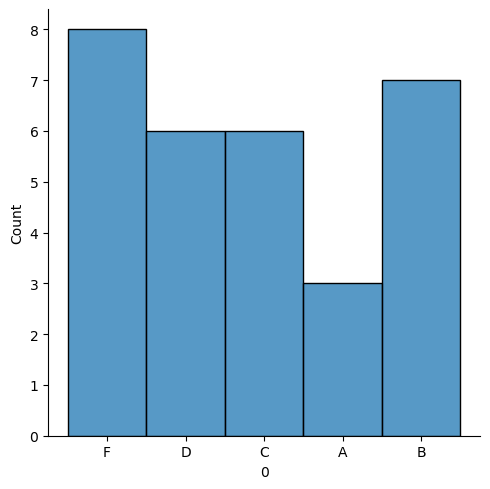

In [200]:
import pandas as pd
import seaborn as sns

labels = ['A', 'B', 'C', 'D', 'F']
df = pd.DataFrame(labels).sample(30, replace=True)
sns.displot(data=df[0])

Exam: You may assume the following imports

In [201]:
import math
import numpy as np
import pandas as pd
from scipy import stats

In [202]:
stat, pval = stats.ttest_1samp(a=[7.9, 8.2, 8.1, 7.9, 7.8, 7.9, 8.0, 7.8, 7.9, 7.9], popmean=8, alternative='less')
pval

0.08392532802853826

In [203]:
import math
import numpy as np
import pandas as pd
from pyreadr import read_r
from scipy import stats
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion, proportions_ztest

def t_confint(series: pd.Series, alpha: float = 0.05):
    n = series.size
    return stats.t.interval(1 - alpha, # confidence
                            df = n - 1, # degrees of freedom = sample size minus One
                            loc = series.mean(),
                            scale = series.sem() # std. deviation by square root of sample size
                            )

## Task 2.A

In [204]:
data = pd.Series(stats.norm.rvs(loc=100, scale=18, size=100, random_state=13))
data.head()

0     87.176968
1    113.567795
2     99.198945
3    108.132622
4    124.211831
dtype: float64

In [205]:
bins = [60, 80, 100, 120, 140]
freq = pd.DataFrame({
    'abs': data.value_counts(bins=bins),
    'rel': data.value_counts(bins=bins, normalize=True)
}).sort_index()
freq['abs_cum'] = freq['abs'].cumsum()
freq['rel_cum'] = freq['rel'].cumsum()
freq

,abs,rel,abs_cum,rel_cum
"(59.999, 80.0]",9,0.09,9,0.09
"(80.0, 100.0]",42,0.42,51,0.51
"(100.0, 120.0]",35,0.35,86,0.86
"(120.0, 140.0]",14,0.14,100,1.00


In [206]:
bins = [60, 80, 100, 120, 140]
freq = pd.DataFrame()
freq['abs'] = data.value_counts(bins=bins)
freq['rel'] = data.value_counts(bins=bins, normalize=True)
freq = freq.sort_index()
freq['rel_cumsum'] = freq['rel'].cumsum()
freq

,abs,rel,rel_cumsum
"(59.999, 80.0]",9,0.09,0.09
"(80.0, 100.0]",42,0.42,0.51
"(100.0, 120.0]",35,0.35,0.86
"(120.0, 140.0]",14,0.14,1.00


In [207]:
mean = data.mean()
median = data.median()
q30 = data.quantile(0.3)
var = data.var()
std = data.std()
cov = std / mean
mean, median, q30, var, std, cov

(101.05133304064378,
 99.7375539197174,
 92.04170187970847,
 284.22029287627527,
 16.858834268011393,
 0.16683435795182053)

In [208]:
t_confint(data, alpha=1-0.98)

(97.06488320793204, 105.03778287335552)

## Task 3.A

In [209]:
stat, pval = proportions_ztest(count=22, nobs=106, value=0.25, alternative='smaller')
stat, pval

(-1.0777411442577356, 0.14057464577346418)

In [251]:
sample_size = 106
consumers_accept_screw_tops = 22
p_null_hypothesis = 0.25
significane_level = 0.1
p_hat = consumers_accept_screw_tops / sample_size
z_stat = (p_hat - p_null_hypothesis) / math.sqrt( p_hat * (1 - p_hat) / sample_size )

#var_ = p_hat * (1 - p_hat)
#z_stat = (p_hat - p_null_hypothesis) / math.sqrt( p_null_hypothesis * (1 - p_null_hypothesis) / sample_size)

p_value = stats.norm.cdf(z_stat)
z_stat, p_value

(-1.0777411442577356, 0.14057464577346418)

In [211]:
proportions_ztest(count=16, nobs=200, value=0.1, alternative='smaller')

(-1.042572070285374, 0.1485732651742352)

In [212]:
z_stat = (16/200 - 0.1) * math.sqrt( 0.1 * 0.9 / 200)
z_stat

-0.0004242640687119286

## Task 4.A

In [213]:
u = [36.4, 55.0, 51.5, 38.7, 43.2, 48.8, 25.6, 49.8]
a = [28.5, 20.0, 46.0, 34.5, 36.5, 52.5, 26.5, 46.5]

In [214]:
df = pd.DataFrame({
    'a': stats.norm.rvs(loc=36, scale=11, size=8, random_state=13),
    'u': stats.norm.rvs(loc=43, scale=10, size=8, random_state=13)
})
df.head()

,a,u
0,28.163703,35.876093
1,44.291430,50.537664
2,35.510466,42.554969
3,40.969936,47.518123
4,50.796119,56.451017


In [215]:
stat, pval = stats.ttest_rel(df['a'], df['u'], alternative='less')
#stat, pval = stats.ttest_rel(df['u'], df['a'], alternative='less')
pval

1.4938049042261634e-08

In [216]:
df['delta'] = df['u'] - df['a']
stat, pval = stats.ttest_1samp(df['delta'], popmean=0.0)
pval

2.987609808452327e-08

## Task 5.A

In [217]:
stat, pval = proportions_ztest(count=[224, 126], nobs=[395, 266])
pval

0.018306758059820384

## Task 2.B

In [218]:
data = pd.Series(stats.norm.rvs(loc=10, scale=1.8, size=100, random_state=9))
data.head()

0    10.001995
1     9.478821
2     7.991081
3     9.976811
4     9.318949
dtype: float64

In [219]:
bins = np.linspace(4.5, 14.5, num=6)
intervals = [(bins[i], bins[i+1]) for i in range(5)]
binned_data = pd.cut(data, bins=bins, include_lowest=True, right=False)
abs_freq = binned_data.value_counts(sort=False)
abs_freq
rel_freq = abs_freq / len(data)
cum_freq = abs_freq.cumsum()


ci = stats.t.interval(confidence=0.9, df=len(data)-1, loc=data.mean(), scale=stats.sem(data))
ci

(9.66289979309343, 10.290825196538762)

In [220]:
freq = pd.DataFrame()
freq['abs'] = data.iloc[0:].value_counts(bins=5)
freq['rel'] = data.iloc[0:].value_counts(bins=5, normalize=True)
freq['abs_cum'] = freq['abs'].sort_index().cumsum()
#freq.sort_index().cumsum()
freq

,abs,rel,abs_cum
"(8.751, 10.64]",47,0.47,66
"(10.64, 12.53]",26,0.26,92
"(6.861, 8.751]",13,0.13,19
"(12.53, 14.419]",8,0.08,100
"(4.960999999999999, 6.861]",6,0.06,6


In [221]:
bins = [4.5, 6.5, 8.5, 10.5, 12.5, 14.5]
freq = pd.DataFrame({
    'abs': data.value_counts(bins=bins),
    'rel': data.value_counts(bins=bins, normalize=True)
}).sort_index()
freq['abs_cum'] = freq['abs'].cumsum()
freq

,abs,rel,abs_cum
"(4.499, 6.5]",5,0.05,5
"(6.5, 8.5]",13,0.13,18
"(8.5, 10.5]",45,0.45,63
"(10.5, 12.5]",28,0.28,91
"(12.5, 14.5]",9,0.09,100


In [222]:
mean = data.mean()
median = data.median()
q30 = data.quantile(0.3)
var = data.var()
std = data.std()
cov = std / mean
mean, median, q30, var, std, cov

(9.976862494816096,
 9.96794873455721,
 9.128698572915358,
 3.5754877327369146,
 1.8908960132003332,
 0.18952812211081677)

In [223]:
t_confint(data, alpha=0.1)

(9.66289979309343, 10.290825196538762)

## Task 3.B

In [224]:
young = [29, 34, 33, 27, 28, 32, 31, 34, 32, 27]
old = [18, 15, 23, 13, 12]

In [225]:
young = stats.norm.rvs(loc=30.7, scale=2.75, size=10, random_state=7).round()
old = stats.norm.rvs(loc=16.2, scale=4.44, size=5, random_state=7).round()
young, old

(array([35., 29., 31., 32., 29., 31., 31., 26., 33., 32.]),
 array([24., 14., 16., 18., 13.]))

In [226]:
stat, pval = stats.ttest_ind(old, young, alternative='less')
pval

1.121864722129117e-06

## Task 4.B

In [227]:
data = [159, 120, 480, 149, 270, 547, 340, 43, 228, 202, 240, 218]
data = stats.norm.rvs(loc=250, scale=145, size=12, random_state=4).round()
data

array([257., 322., 106., 351., 189.,  20., 156., 337., 298.,  84., 340.,
       237.])

In [228]:
stat, pval = stats.ttest_1samp(data, popmean=200, alternative='greater')
#stat, pval = stats.ttest_1samp(data, popmean=200, alternative='larger')
pval

0.23137005608613243

## Task 5.B

In [229]:
stat, pval = proportions_ztest(count=[18, 12], nobs=[56, 51])
pval

0.32183237916030005

# Task 2.C

In [230]:
data = read_r('../data/devore7/xmp01.09.rda')
df = data['xmp01.09']
df.describe()

,consump
count,90.000000
mean,10.039778
std,2.866816
min,2.970000
25%,7.947500
50%,9.835000
75%,12.045000
max,18.260000


In [231]:
data = pd.Series(stats.norm.rvs(loc=10.04, scale=2.87, size=90, random_state=12))
data.head()

0    11.397469
1     8.084308
2    10.735801
3     5.158889
4    12.201520
dtype: float64

In [232]:
bins = [0, 4, 8, 12, 16, 20]
freq = pd.DataFrame({
    'abs': data.value_counts(bins=bins),
    'rel': data.value_counts(bins=bins, normalize=True)
}).sort_index()
freq['rel_cum'] = freq['rel'].cumsum()
freq

,abs,rel,rel_cum
"(-0.001, 4.0]",3,0.033333,0.033333
"(4.0, 8.0]",21,0.233333,0.266667
"(8.0, 12.0]",49,0.544444,0.811111
"(12.0, 16.0]",14,0.155556,0.966667
"(16.0, 20.0]",3,0.033333,1.000000


In [233]:
mean = data.mean()
median = data.median()
q30 = data.quantile(0.3)
var = data.var()
std = data.std()
cov = std / mean
mean, median, q30, var, std, cov

(9.68036792952608,
 9.73702801371696,
 8.270534176760762,
 9.533984467540302,
 3.087715088465952,
 0.3189667077682157)

In [234]:
t_confint(data, alpha=1-0.85)

(9.207759122948508, 10.152976736103652)

# Task 3.C

In [235]:
import pandas as pd
data = pd.Series(stats.norm.rvs(loc=98.38, scale=6.11, size=12, random_state=3))
data.head()

0    109.308520
1    101.047075
2     98.969600
3     86.994060
4     96.685158
dtype: float64

In [236]:
_, pval = stats.ttest_1samp(data, popmean=100, alternative='two-sided')
pval

0.15579727662407578

# Task 4.C

In [237]:
df = pd.DataFrame({
    'indoor': stats.norm.rvs(loc=40, scale=0.8, size=40, random_state=14),
    'outdoor': stats.norm.rvs(loc=40, scale=1, size=40, random_state=41)
})
df.head()

,indoor,outdoor
0,41.241071,39.729288
1,40.063349,40.104848
2,40.139181,40.250528
3,39.942131,39.074800
4,38.396536,40.567144


In [238]:
_, pval = stats.ttest_rel(df['indoor'], df['outdoor'], alternative='two-sided')
pval

0.34623589056049664

# Task 5.C

A plastics manufacturer has developed a new type of plastic trash can and proposes to sell them with an unconditional 6-year warranty. To see whether this is economically feasible, 80 prototype cans are subjected to an accelerated life test to simulate 6 years of use. 70 of those tested cans survived the accelerated test. Do we have enough evidence, that proportion of trash cans surviving the test is less than 90%? Use α = .05

In [239]:
_, pval = proportions_ztest(count=70, nobs=80, value=0.9, alternative='smaller')
#_, pval = proportions_ztest(count=10, nobs=80, value=0.9, alternative='smaller')
pval

0.2494811493018803

In [240]:
df = pd.DataFrame({
    'indoor': stats.norm.rvs(loc=40, scale=0.8, size=40, random_state=14),
    'outdoor': stats.norm.rvs(loc=40, scale=1, size=40, random_state=41)
})
_, pval = stats.ttest_rel(df['indoor'], df['outdoor'], alternative='two-sided')
#_, pval = stats.ttest_ind(df['indoor'], df['outdoor'], alternative='two-sided')
pval

0.34623589056049664

In [241]:
data = stats.norm.rvs(loc=98.38, scale=6.11, size=12, random_state=3)
_, pval = stats.ttest_1samp(data, popmean=100, alternative="less")
pval

0.07789863831203789

In [242]:
_, pval = proportions_ztest(count=70, nobs=80, value=0.90, alternative="smaller")
pval

0.2494811493018803

In [243]:
data = pd.Series(stats.norm.rvs(loc=10.04, scale=2.87, size=90, random_state=12))
data.head()
bins=[-0.001, 4, 8, 12, 16, 20]
freq = pd.cut(data, bins=bins, include_lowest=True, right=False)
abs = freq.value_counts(sort=False)
rel = abs / len(data)
cum = np.cumsum(rel)

ci = stats.t.interval(0.85, len(data)-1, loc=mean, scale=data.std()/np.sqrt(len(data)))
ci

(9.207759122948508, 10.152976736103652)

In [244]:
data = pd.Series(stats.norm.rvs(loc=10, scale=1.8, size=100, random_state=9))
data.head()
bins = np.linspace(4.5, 14.5, 6)
freq = pd.cut(data, bins=bins, include_lowest=True).value_counts().sort_index()
rel = freq / freq.sum()
cum = freq.cumsum()
cum

(4.499, 6.5]      5
(6.5, 8.5]       18
(8.5, 10.5]      63
(10.5, 12.5]     91
(12.5, 14.5]    100
dtype: int64

In [245]:
data = pd.Series(stats.norm.rvs(loc=10.04, scale=2.87, size=90, random_state=12))
class_interval = pd.interval_range(start=0.0, end=2.87, freq=4)
class_interval = pd.interval_range(start=0.0, end=20, freq=4)
class_labels = [f"{i.left}-{i.right}" for i in class_interval]
abs = pd.cut(data, bins=class_interval, labels=class_labels, include_lowest=True).value_counts().sort_index()
rel = abs / sum(abs)
cum = np.cumsum(rel)
cum

(0.0, 4.0]      0.033333
(4.0, 8.0]      0.266667
(8.0, 12.0]     0.811111
(12.0, 16.0]    0.966667
(16.0, 20.0]    1.000000
dtype: float64

In [246]:
data = pd.Series(stats.norm.rvs(loc=98.38, scale=6.11, size=12, random_state=3))

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
test_stat = (sample_mean - 100) / (sample_std / np.sqrt(len(data)))
p_value = 2 * stats.t.cdf(test_stat, df=len(data)-1)
p_value

0.15579727662407594

In [4]:
from statsmodels.stats.proportion import proportions_ztest

_, pval = proportions_ztest(count=[233, 109], nobs=[233+81, 468+109], alternative='larger')
pval

1.8558738850567398e-59